In [2]:
import pickle
import random
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
airlines = [
    ('American Airlines','sentiment_data/american.pkl'),
    ('Delta Airlines', 'sentiment_data/delta.pkl'),
    ('Spirit Airlines', 'sentiment_data/spirit.pkl'),
    ('Southwest Airlines', 'sentiment_data/southwest.pkl')
]

In [4]:
data_dict = {}
for airline_name, pickle_file in airlines:
    data_dict[airline_name] = pd.read_pickle(pickle_file)

In [5]:
data_dict['Delta Airlines']

,text,comments,comments_full,sentiments
time,,,,
2023-07-18 14:30:00,What words rhyme with Delta?,2420,"[(Emily Carlton Wagoner, Felta nother trip com...","(35, 2, 23)"
2023-07-13 00:00:00,Delta Air Lines\n\nSharing is caring ❤️️\n\nSe...,303,"[(Tita Yo, We were in Copenhagen last week. Fl...","(26, 22, 12)"
2023-07-12 00:00:00,Delta Air Lines\n\nSilver Medallion Member Law...,8310,"[(Annetta Burke, Brilliant team work), (Jane V...","(60, 0, 0)"
2023-07-11 11:58:57,"When you’re out there seeing the world, the wo...",93,"[(Anita Delta Moncur, I Really Love You Delta ...","(11, 15, 4)"
2023-07-10 12:00:18,"🔐 Unlock more than fast, free Wi-Fi.\n\nGet ex...",210,"[(Thomas Poster, Delta Airlines ! Thanks for e...","(25, 23, 12)"
...,...,...,...,...
2020-05-22 13:57:46,Nothing is more important than the health and ...,1043,"[(Dawn Barrack, I had to fly this past week fr...","(16, 31, 13)"
2020-05-19 00:00:00,Delta Air Lines\n\nYour safety always comes fi...,1948,"[(Walter Bass, Delta Air Lines my husband and ...","(10, 32, 18)"
2020-05-15 00:00:00,Delta Air Lines\n\nThe safety of our customers...,1085,"[(Pat Kaufman, Dear Delta, I was booked for di...","(18, 36, 6)"


df['']

In [12]:
#grab a random post from a random airline
random_airline = 'Southwest Airlines'
airline_data = data_dict[random_airline]
random_post = airline_data.sample()

#grab a random comment from this post
comments = random_post['comments_full'].values[0]
random_idx = random.randint(0, len(comments)-1)
random_comment = comments[random_idx]

print(f'Airline: {random_airline}')
post_text = random_post["text"].values[0].replace("\n", " ")
print(f'Post: {post_text}')
sentiment = airline_data['sentiments'].values[random_idx]
print(f'Sentiment: {sentiment}')


Airline: Southwest Airlines
Post: Mackenzie was a kid the first time she rode on a Southwest plane flown by her dad, Captain Kyle. Last month, they had another special “first” together: sharing the flight deck for Mackenzie's first flight as a Southwest Pilot! Now that's some quality Father/Daughter bonding time. #SouthwestHeart
Sentiment: (7, 2, 2)


<Axes: title={'center': 'Southwest Airlines Comments over Time'}, xlabel='Post Date', ylabel='Number of Comments'>

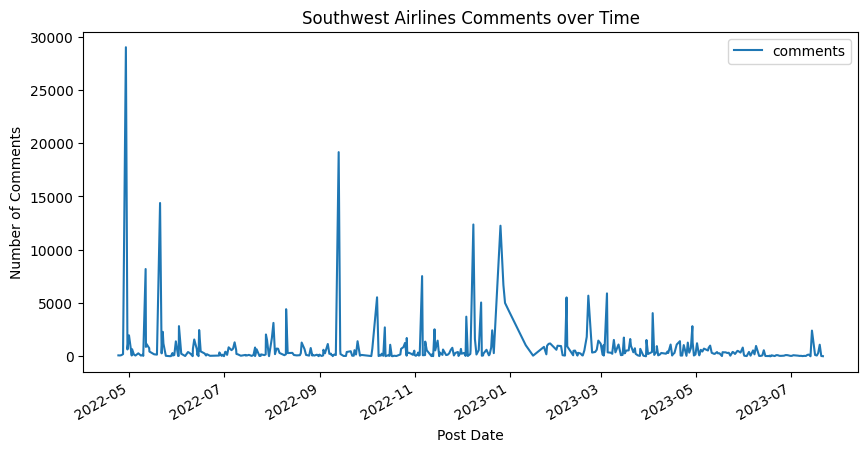

In [169]:
#graph number of comments per post
airline_data.plot(y='comments', figsize=(10,5), title=f'{random_airline} Comments over Time', ylabel='Number of Comments', xlabel='Post Date')

Text(0.5, 0, 'Post Date')

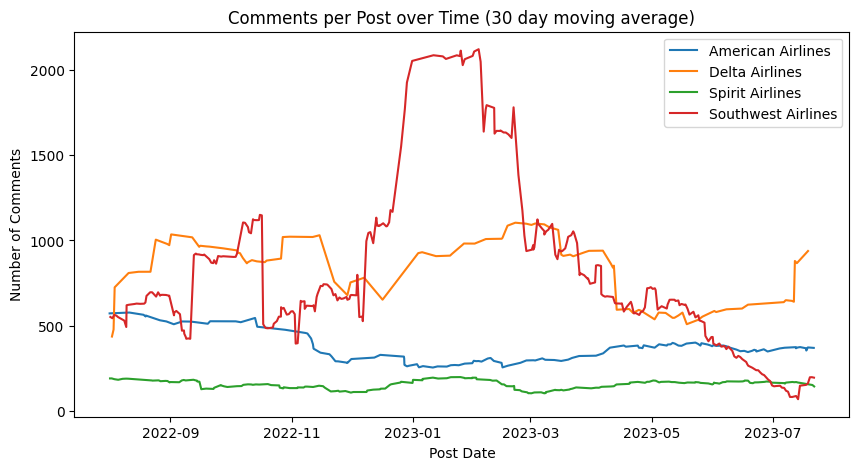

In [170]:
#plot moving average of comments per post for each airline
timeRange = ('2022-08-01', '2023-08-01')
fig, ax = plt.subplots(figsize=(10,5))
for i, (airline_name, airline_df) in enumerate(data_dict.items()):
    airline_df = airline_df.sort_index()
    airline_df['comments_rolling'] = airline_df['comments'].rolling(30).mean()
    airline_df = airline_df[(airline_df.index > timeRange[0]) & (airline_df.index < timeRange[1])]
    #sort by date

    ax.plot(airline_df.index, airline_df['comments_rolling'], color=f'C{i}')
    ax.legend(data_dict.keys())
    
ax.set_title('Comments per Post over Time (30 day moving average)')
ax.set_ylabel('Number of Comments')
ax.set_xlabel('Post Date')

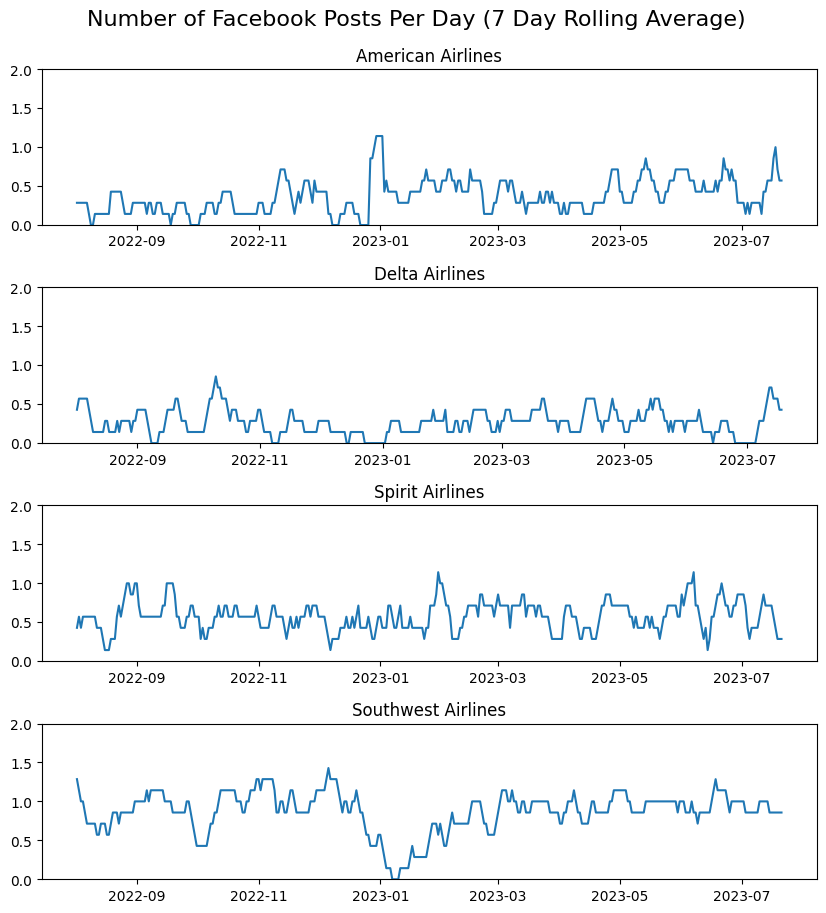

In [166]:
#plot number of posts over time
rolling_dict = {}
for airline, airline_df in data_dict.items():
    posts_per_day = airline_df.copy()
    posts_per_day = posts_per_day[['text']].resample('D').count()

    posts_per_day['text_rolling'] = posts_per_day['text'].rolling(7).mean()
    # posts_per_day.plot(y=['text', 'text_rolling'], figsize=(15,5), title=f'{airline_name} Posts over Time', ylabel='Number of Posts', xlabel='Post Date', label=['Number of Posts', '7 Day Rolling Average'])

    rolling_dict[airline] = posts_per_day

timeRange = ('2022-08-01', '2023-08-01')
fig, ax = plt.subplots(4, 1, figsize=(10,10))
fig.suptitle('Number of Facebook Posts Per Day (7 Day Rolling Average)', fontsize=16)
#change title spacing
fig.subplots_adjust(top=0.92)
#make title bold
for i, (airline_name, airline_df) in enumerate(rolling_dict.items()):
    #get only the comments from the time range
    airline_df = airline_df[(airline_df.index > timeRange[0]) & (airline_df.index < timeRange[1])]
    #sport by time
    airline_df = airline_df.sort_index()
    ax[i].plot(airline_df.index, airline_df['text_rolling'], label=airline_name)
    #add title
    ax[i].set_title(airline_name)
    #set limits
    ax[i].set_ylim(0, 2)

    #add space for title
    fig.subplots_adjust(hspace=0.4)

plt.show()

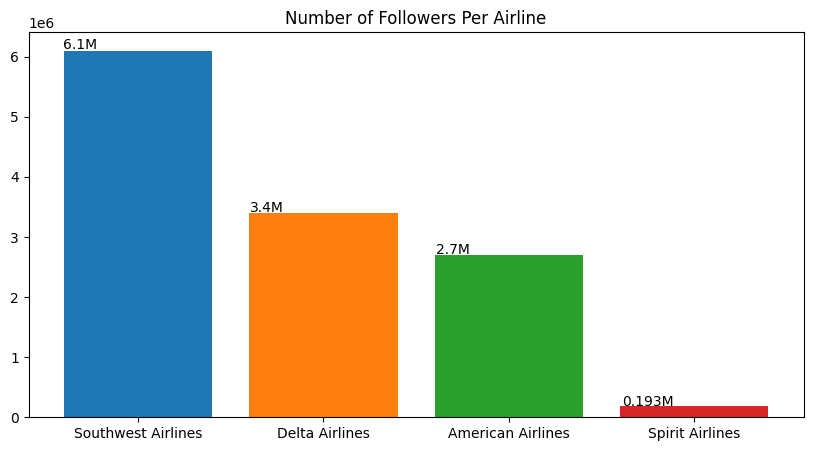

In [171]:
#Plot number of followers per account (as of July 2023)
followers = {'Southwest Airlines': 6_100_000, 'Delta Airlines': 3_400_000, 'American Airlines': 2_700_000, 'Spirit Airlines': 193_000}

fig, ax = plt.subplots(1,1, figsize=(10,5))

plt.title('Number of Followers Per Airline')
for airline_name, follower_count in followers.items():
    ax.bar(airline_name, follower_count)

#show number above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1_000_000}M', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()